<a href="https://colab.research.google.com/github/dalanocau/Taller-Program-1T/blob/main/A10_ALANOCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

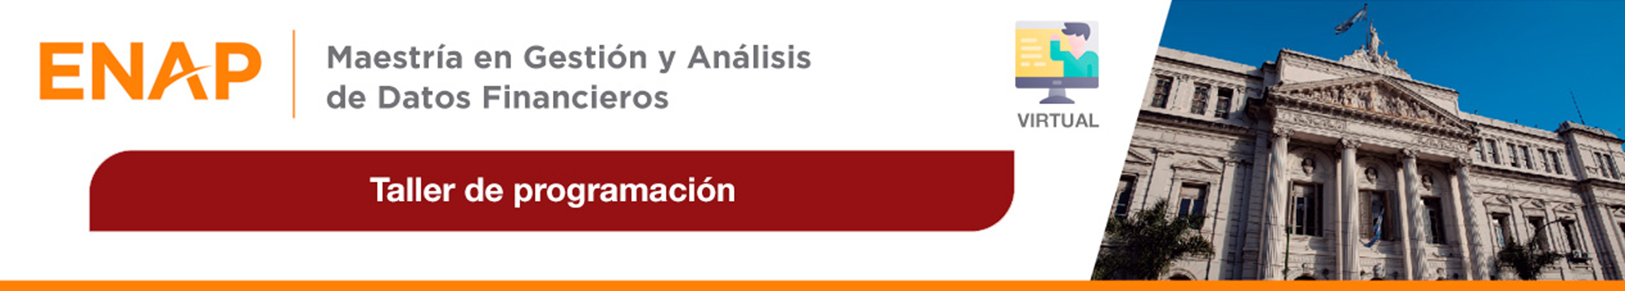

M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS
# TALLER DE PROGRAMACIÓN

Natalia Salaberry

**Actividad 10**

**1. Busque un conjunto de datos o utlice el suyo propio para trabajar. Si el archivo de datos no se descarga de la web, entonces subalo a su Drive, compartalo y deje el código de conexión necesario para su lectura.**

In [17]:
import gdown

# URL del archivo en Google Drive (extraída del link compartido)
file_url = "https://drive.google.com/uc?id=1WirGK7gCR7YJY7r0BqsQxMy08nxn6kYK"

# Descargar el archivo y guardarlo como kaggle.json
gdown.download(file_url, "kaggle.json", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1WirGK7gCR7YJY7r0BqsQxMy08nxn6kYK
To: /content/kaggle.json
100%|██████████| 76.0/76.0 [00:00<00:00, 204kB/s]


'kaggle.json'

In [18]:
import os
import zipfile

# Mover kaggle.json a la ubicación correcta
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Permisos

# Descargar el dataset desde Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Extraer el archivo descargado
with zipfile.ZipFile("creditcardfraud.zip", "r") as zip_ref:
    zip_ref.extractall()



Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("creditcard.csv")

# Mostrar las primeras filas
df.head(3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


**2. Obtenga una submuestra de su conjunto de datos bajo un objetivo específico**

In [ ]:
# Filtrar transacciones fraudulentas y no fraudulentas
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)  # Muestra aleatoria del mismo tamaño

# Concatenar las muestras
submuestra = pd.concat([fraud, non_fraud])

# Verificar la distribución de clases
submuestra['Class'].value_counts()


,count
Class,
1,492
0,492


**3. Realice un análisis de casos anómalos sobre las variables que considere principales para el objetivo buscado**

In [ ]:
from sklearn.ensemble import IsolationForest

# Seleccionar variables relevantes
X = submuestra[['Amount', 'Time']]

# Inicializar el modelo Isolation Forest
modelo = IsolationForest(contamination=0.05, random_state=42)

# Ajustar el modelo y predecir anomalías
submuestra['Anomalía'] = modelo.fit_predict(X)

# Verificar cuántas anomalías detectó
submuestra['Anomalía'].value_counts()


,count
Anomalía,
1,934
-1,50


**4. En caso de haber detectado casos anómalos, escriba que decisión tomaría y cuales serían sus consecuencias**

**Revisión manual**

Asegura que no haya falsos positivos, pero requiere tiempo y recursos del equipo de fraude.

In [ ]:
#Reportarlas para revisión manual
casos_anomalos = submuestra[submuestra['Anomalía'] == -1]
casos_anomalos


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Anomalía
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,-1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,-1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1,-1
10630,17838.0,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,-4.897006,...,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,766.36,1,-1
10690,18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1,-1
16863,28242.0,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,...,-0.246202,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,730.86,1,-1
23422,32745.0,-2.179135,0.020218,-2.182733,2.572046,-3.663733,0.081568,0.268049,0.660437,-2.374027,...,0.299614,1.656800,0.328433,0.106457,0.691775,0.196779,0.241085,717.15,1,-1
39183,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83,1,-1
44001,41743.0,-2.144411,1.073499,-2.773663,1.384394,-4.015477,0.747235,1.525638,0.192988,-2.431862,...,-0.885682,0.625099,0.096527,-0.189455,0.532908,0.423045,-0.210266,802.52,1,-1
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1,-1


**Eliminar casos anómalos del análisis**

Nos Permite analizar datos "limpios", pero se tiene perdida de información valiosa para mejorar futuros modelos de detección.

In [ ]:
#Eliminar las anomalías
submuestra_filtrada = submuestra[submuestra['Anomalía'] == 1]
